In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [100]:
from google.colab import drive
drive.mount('/content/gdrive')
data = pd.read_csv("gdrive/My Drive/Colab Notebooks/FeatureEngineering/train_date.csv")
data.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,Date,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,12/6/2019,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,12/7/2019,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,12/8/2019,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,12/9/2019,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,12/10/2019,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [101]:
data.dtypes

Date            object
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [102]:
data['Date'] = pd.to_datetime(data['Date'])

data.head()

,Date,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2019-12-06,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2019-12-07,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2019-12-08,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,2019-12-09,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,2019-12-10,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [103]:
data.dtypes

Date           datetime64[ns]
PassengerId             int64
Survived                int64
Pclass                  int64
Name                   object
Sex                    object
Age                   float64
SibSp                   int64
Parch                   int64
Ticket                 object
Fare                  float64
Cabin                  object
Embarked               object
dtype: object

[]

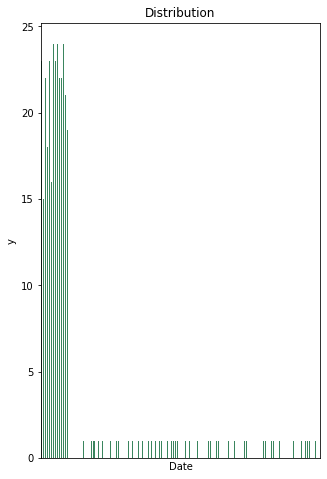

In [104]:
fig = data.groupby(['Date'])['Survived'].sum().plot(
                   figsize=(5, 8), linewidth=1, kind='bar')

fig.set_title('Distribution')
fig.set_ylabel('y')
fig.set_xticks([])

In [0]:
data['year'] = pd.DatetimeIndex(data['Date']).year

In [106]:
data.dtypes

Date           datetime64[ns]
PassengerId             int64
Survived                int64
Pclass                  int64
Name                   object
Sex                    object
Age                   float64
SibSp                   int64
Parch                   int64
Ticket                 object
Fare                  float64
Cabin                  object
Embarked               object
year                    int64
dtype: object

In [107]:
data[['Date', 'year']].head()

,Date,year
0,2019-12-06,2019
1,2019-12-07,2019
2,2019-12-08,2019
3,2019-12-09,2019
4,2019-12-10,2019


In [108]:
data['month'] = pd.DatetimeIndex(data['Date']).month
data[['Date', 'year', 'month']].tail()

,Date,year,month
886,2019-12-17,2019,12
887,2019-12-18,2019,12
888,2019-12-19,2019,12
889,2022-05-13,2022,5
890,2022-05-14,2022,5


In [109]:
data['day'] = pd.DatetimeIndex(data['Date']).day
data[['Date', 'year', 'month', 'day']].tail()

,Date,year,month,day
886,2019-12-17,2019,12,17
887,2019-12-18,2019,12,18
888,2019-12-19,2019,12,19
889,2022-05-13,2022,5,13
890,2022-05-14,2022,5,14


In [110]:
data['week'] = pd.DatetimeIndex(data['Date']).week
data[['Date', 'year', 'month', 'day', 'week']].tail()

,Date,year,month,day,week
886,2019-12-17,2019,12,17,51
887,2019-12-18,2019,12,18,51
888,2019-12-19,2019,12,19,51
889,2022-05-13,2022,5,13,19
890,2022-05-14,2022,5,14,19


In [111]:
data['weekday'] = pd.DatetimeIndex(data['Date']).weekday
data[['Date', 'year', 'month', 'day', 'week', 'weekday']].head()

,Date,year,month,day,week,weekday
0,2019-12-06,2019,12,6,49,4
1,2019-12-07,2019,12,7,49,5
2,2019-12-08,2019,12,8,49,6
3,2019-12-09,2019,12,9,50,0
4,2019-12-10,2019,12,10,50,1


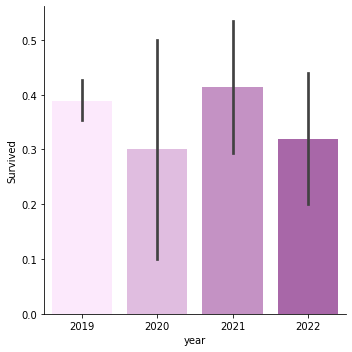

In [112]:
sns.set_palette(sns.light_palette("purple"))
sns.catplot(x = 'year' , y='Survived', kind ='bar', data = data)

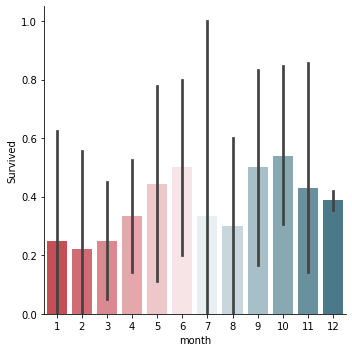

In [113]:
sns.set_palette(sns.diverging_palette(10, 220, n=12))
sns.catplot(x = 'month' , y='Survived', kind ='bar', data = data)

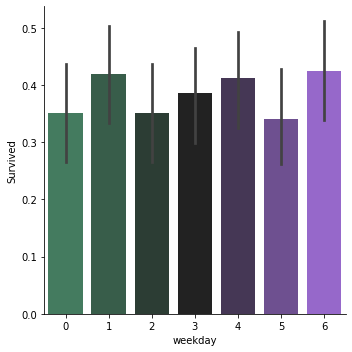

In [114]:
sns.set_palette(sns.diverging_palette(145, 280, n=7, center='dark'))
sns.catplot(x = 'weekday' , y='Survived', kind ='bar', data = data)